In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

## Read PreLect features

In [3]:
types = ['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']

In [4]:
# os.chdir('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch_noZ/Level1/feature_selection_k3')
# os.chdir(r'C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_batch_noZ\Level1\feature_selection_k3')
os.chdir(source_code_dir / 'PBMC_Hao_batch_noZ/Level1/feature_selection_k3')

features_dict = {}
# Read features for each celltype
for celltype in types:
    try:
        feature_df_k3 = pd.read_csv(f'{celltype}_features.txt', names=['Gene', 'Weight', 'Tendency'], sep='\t')
        features_dict[celltype] = feature_df_k3
    except:
        print('skipping:', celltype)
        continue

count_df_k3 = pd.DataFrame(columns=['Feature_count', 'Positive_feature_count'])
for celltype in features_dict.keys():
    feature_df_k3 = features_dict[celltype]
    feature_count = feature_df_k3.shape[0]
    positive_count = feature_df_k3[feature_df_k3['Tendency'] == 1].shape[0]
    count_df_k3.loc[celltype] = [feature_count, positive_count]
count_df_k3

,Feature_count,Positive_feature_count
B,19,10
CD4_T,201,95
CD8_T,23,9
DC,50,23
Mono,50,20
NK,33,17
other,5,3
other_T,247,112


In [5]:
features_dict['B']

,Gene,Weight,Tendency
0,S100A4,-0.114020,0
1,RALGPS2,0.301575,1
2,PTPRC,-0.208567,0
3,IGKC,0.538239,1
4,BANK1,0.439536,1
5,CD74,0.140212,1
6,HLA-DRA,0.083732,1
7,ACTB,-0.174101,0
8,TMSB4X,-0.528301,0
9,MS4A1,1.210195,1


## Read overlapped markers with ACT

In [6]:
# with open(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_batch_noZ\Level1\ACT_annotation\L1_PreLect_ACT_overlap.json", 'r') as f:
#     overlapped_dict = json.load(f)
with open(source_code_dir / 'PBMC_Hao_batch_noZ/Level1/ACT_annotation/L1_PreLect_ACT_overlap.json', 'r') as f:
    overlapped_dict = json.load(f)
overlapped_dict

{'B': ['CD74', 'MS4A1', 'IGKC', 'CD79B', 'CD79A', 'IGHM', 'HLA-DRA', 'PTPRC'],
 'CD4_T': ['CD3E',
  'IL7R',
  'NKG7',
  'MT-ND4',
  'CCL5',
  'CD3D',
  'CD4',
  'TNFAIP3',
  'LDHB',
  'LTB',
  'PTPRC',
  'ISG20',
  'CD3G'],
 'CD8_T': ['CD3E', 'CD8B', 'CCL5', 'CD8A', 'CD3D', 'CD3G', 'LTB', 'KLRB1'],
 'DC': ['CLEC10A',
  'HLA-DPB1',
  'IRF8',
  'HLA-DPA1',
  'CST3',
  'S100A9',
  'HLA-DRA',
  'FTL',
  'FCER1A'],
 'Mono': ['FCN1',
  'LST1',
  'NEAT1',
  'MALAT1',
  'S100A9',
  'S100A8',
  'FTL',
  'CTSS',
  'CFD',
  'PSAP',
  'CD14'],
 'NK': ['NKG7',
  'IL2RB',
  'KLRF1',
  'PRF1',
  'KLRD1',
  'SPON2',
  'GZMB',
  'GNLY',
  'CD247',
  'KLRB1']}

In [7]:
features_dict.keys()

dict_keys(['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T'])

In [8]:
overlapped_dict.keys()

dict_keys(['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK'])

In [9]:
# add a new column "in_ACT" to indicate whether the PreLect feature is overlapped with ACT
for k, df in features_dict.items():
    print(k)
    if k not in overlapped_dict.keys():
        continue
    overlap = overlapped_dict[k]
    df['in_ACT'] = ['ACT' if gene in overlap else 'not_ACT' for gene in df['Gene']]

B
CD4_T
CD8_T
DC
Mono
NK
other
other_T


In [10]:
features_dict['CD4_T']['in_ACT'].value_counts()

in_ACT
not_ACT    188
ACT         13
Name: count, dtype: int64

## Plot PreLect weight boxplot

B


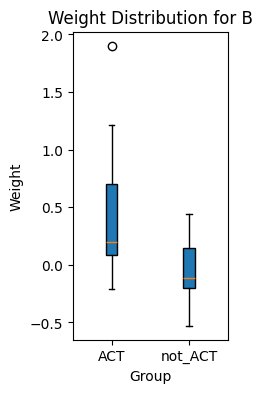

CD4_T


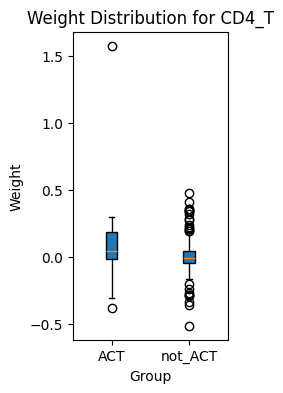

CD8_T


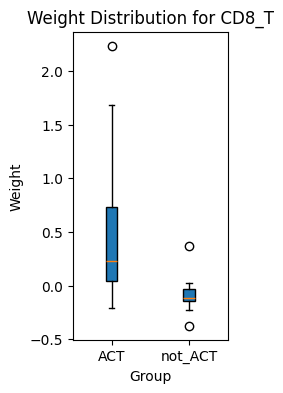

DC


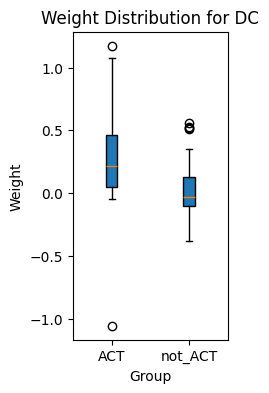

Mono


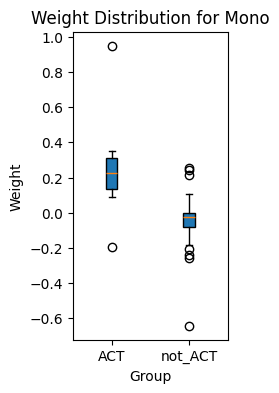

NK


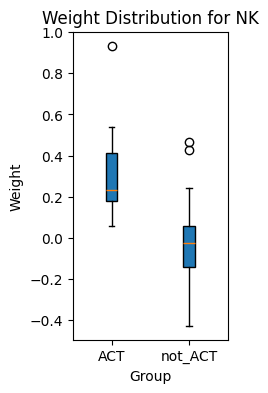

other
other_T


In [11]:
data_is_ACT = dict()
data_not_ACT = dict()
for k, df in features_dict.items():
    print(k)
    if k not in overlapped_dict.keys():
        continue
    weight_is_ACT = df[df['in_ACT'] == 'ACT']['Weight'].to_numpy()
    weight_not_ACT = df[df['in_ACT'] == 'not_ACT']['Weight'].to_numpy()
    data_is_ACT[k] = weight_is_ACT
    data_not_ACT[k] = weight_not_ACT

    # Creating boxplots for 'Weight'
    plt.figure(figsize=(2, 4))
    plt.boxplot(
        [weight_is_ACT, weight_not_ACT],
        labels=['ACT', 'not_ACT'],
        patch_artist=True
    )
    plt.title(f'Weight Distribution for {k}')
    plt.ylabel('Weight')
    plt.xlabel('Group')
    plt.show()

In [12]:
data_is_ACT

{'B': array([-0.20856653,  0.53823924,  0.14021173,  0.08373232,  1.2101951 ,
         0.0881204 ,  0.25690877,  1.9022245 ]),
 'CD4_T': array([ 0.01885271,  0.30089977,  0.18842982,  0.02695241,  0.0974281 ,
         0.11167076,  0.22783433,  1.5742388 ,  0.04737792, -0.01340941,
        -0.37635794, -0.12487514, -0.30438155]),
 'CD8_T': array([ 1.6812518 ,  2.2372637 , -0.03966729,  0.06422714,  0.41414815,
         0.3232028 , -0.20809597,  0.13478512]),
 'DC': array([-0.04544658,  1.0742234 ,  0.14036627,  0.21243906,  0.46355063,
         0.05145001,  0.33393794,  1.173688  , -1.0575426 ]),
 'Mono': array([ 0.9491321 ,  0.08717205,  0.25720397,  0.12971479,  0.16760378,
         0.13861069,  0.34970948, -0.19359487,  0.3409704 ,  0.28419855,
         0.22511119]),
 'NK': array([0.46718475, 0.53889763, 0.23977034, 0.18902078, 0.13581242,
        0.9340901 , 0.2327426 , 0.05687784, 0.17402911, 0.22727016])}

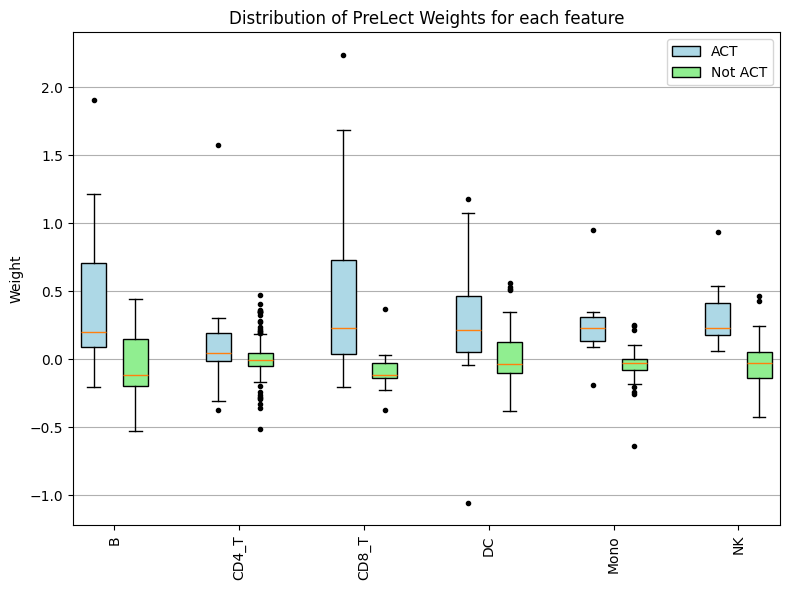

In [13]:
# Prepare data for plotting
keys = list(data_is_ACT.keys())
data_to_plot = []

for key in keys:
    # Collect data for both groups
    is_ACT_data = data_is_ACT[key]
    not_ACT_data = data_not_ACT[key]
    data_to_plot.append([is_ACT_data, not_ACT_data])

# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Positions for the boxplots
positions = []
labels = []
for i, key in enumerate(keys):
    positions.extend([i * 3 + 1, i * 3 + 2])
    labels.extend([f"{key}\nACT", f"{key}\nNot ACT"])

# Flatten the data list
flat_data = [item for sublist in data_to_plot for item in sublist]

# Create boxplots
bp = ax.boxplot(flat_data, positions=positions, widths=0.6, patch_artist=True, 
                flierprops={'marker': 'o', 'markersize': 3, 'markerfacecolor': 'black'})

# Customize colors
colors = ['lightblue', 'lightgreen'] * len(keys)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Set x-ticks and labels
ax.set_xticks([i * 3 + 1.5 for i in range(len(keys))])
ax.set_xticklabels(keys)
plt.xticks(rotation=90)

# Add a grid
ax.yaxis.grid(True)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightblue', edgecolor='black', label='ACT'),
                   Patch(facecolor='lightgreen', edgecolor='black', label='Not ACT')]
ax.legend(handles=legend_elements, loc='upper right')

# Set labels and title
ax.set_ylabel('Weight')
ax.set_title('Distribution of PreLect Weights for each feature')

# Show plot
plt.tight_layout()
plt.show()

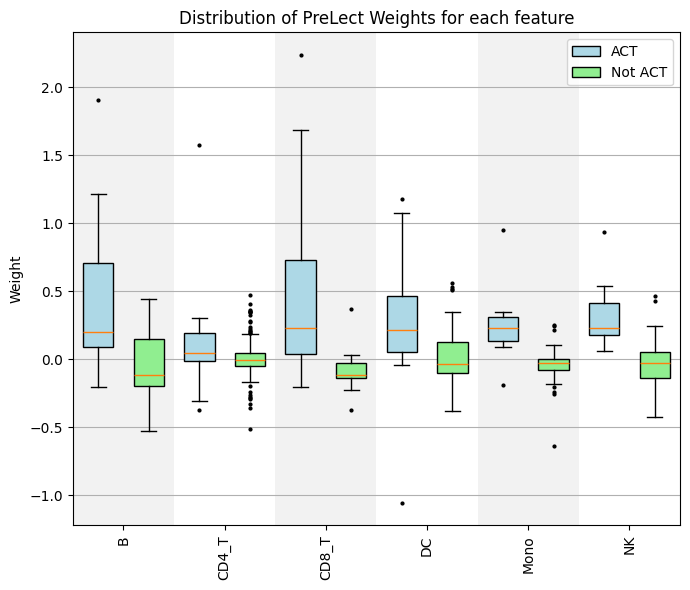

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Data Preparation
keys = list(data_is_ACT.keys())
data_to_plot = []

for key in keys:
    is_ACT_data = data_is_ACT[key]
    not_ACT_data = data_not_ACT[key]
    data_to_plot.append([is_ACT_data, not_ACT_data])

# Create figure and axes
fig, ax = plt.subplots(figsize=(7, 6))

# Positions for the boxplots
positions = []
labels = []
for i, key in enumerate(keys):
    positions.extend([i * 2 + 1, i * 2 + 2])  # Adjust positions to match two columns per key
    labels.extend([f"{key}\nACT", f"{key}\nNot ACT"])

# Flatten the data list
flat_data = [item for sublist in data_to_plot for item in sublist]

# Add alternating gray backgrounds
for i in range(len(keys)):
    if i % 2 == 0:  # Add gray background for even-indexed keys
        start = i * 2 + 0.5  # Start slightly before the first boxplot
        end = (i + 1) * 2 + 0.5  # End slightly after the second boxplot
        ax.axvspan(start, end, facecolor='gray', alpha=0.1)

# Create boxplots
bp = ax.boxplot(flat_data, positions=positions, widths=0.6, patch_artist=True, 
                flierprops={'marker': 'o', 'markersize': 2, 'markerfacecolor': 'black'})

# Customize colors
colors = ['lightblue', 'lightgreen'] * len(keys)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Set x-ticks and labels with 90-degree rotation
ax.set_xticks([i * 2 + 1.5 for i in range(len(keys))])
ax.set_xticklabels(keys, rotation=90)  # Rotate x-tick labels by 90 degrees

# Add a grid
ax.yaxis.grid(True)

# Add legend
legend_elements = [
    Patch(facecolor='lightblue', edgecolor='black', label='ACT'),
    Patch(facecolor='lightgreen', edgecolor='black', label='Not ACT')
]
ax.legend(handles=legend_elements, loc='upper right')

# Set labels and title
ax.set_ylabel('Weight')
ax.set_title('Distribution of PreLect Weights for each feature')

# Show plot
plt.tight_layout()
plt.show()
